- Идентификатор заявки: SkillFactory_Id
- Дата рождения: BirthDate
- Адрес проживания: -
- Исключен из расчета
- Образование: education
- Тип занятости: employment status
- Стаж работы: Value
- Дата начала работы: JobStartDate
- Должность: Position
- Рабочий телефон: -
- Исключен из расчета
- Ежемесячный доход: MonthProfit
- Ежемесячный расход: MonthExpense
- Пол: Gender
    - Значения: 0 = М, 1 = Ж
- Семейное положение: Family status
- Кол-во детей младше 18 лет: ChildCount
- СНИЛС: SNILS
    - Значения: 0 = не указан в анкете, 1 = указан
- Параметры заказа
    - Сумма заказа: Loan_amount
    - Срок кредита: Loan_term
    - Категория товара: Goods_category
    - Код магазина: Merch_code
- Решение банка А: BankA_decision
    - Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошику
- Решение банка B: BankB_decision
    - Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку
- Решение банка C: BankC_decision
    - Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку
- Решение банка D: BankD_decision
    - Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку
- Решение банка E: BankE_decision
    - Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def drop_outliers(df, column_name):
    """
    Drop outliers from a DataFrame based on a specified column.

    Parameters:
    - df: DataFrame
    - column_name: str, the column to check for outliers

    Returns:
    - DataFrame without outliers
    """

    # Calculate the 95% confidence interval
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify and drop outliers
    outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    df_no_outliers = df[~outliers]

    return df_no_outliers

In [3]:
df = pd.read_csv('SF_Mandarin_dataset_ver3.csv', sep=';', index_col=0)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8787 entries, 1.0 to nan
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BirthDate          6603 non-null   object 
 1   education          6603 non-null   object 
 2   employment status  6603 non-null   object 
 3   Value              6523 non-null   object 
 4   JobStartDate       6494 non-null   object 
 5   Position           6494 non-null   object 
 6   MonthProfit        6603 non-null   float64
 7   MonthExpense       6603 non-null   float64
 8   Gender             6566 non-null   float64
 9   Family status      6566 non-null   object 
 10  ChildCount         6566 non-null   float64
 11  SNILS              6603 non-null   float64
 12  BankA_decision     6603 non-null   object 
 13  BankB_decision     6603 non-null   object 
 14  BankC_decision     6603 non-null   object 
 15  BankD_decision     6603 non-null   object 
 16  BankE_decision     6603 non-

In [5]:
df.dropna(inplace=True)


In [6]:
df.index = df.index.astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6464 entries, 1 to 8787
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BirthDate          6464 non-null   object 
 1   education          6464 non-null   object 
 2   employment status  6464 non-null   object 
 3   Value              6464 non-null   object 
 4   JobStartDate       6464 non-null   object 
 5   Position           6464 non-null   object 
 6   MonthProfit        6464 non-null   float64
 7   MonthExpense       6464 non-null   float64
 8   Gender             6464 non-null   float64
 9   Family status      6464 non-null   object 
 10  ChildCount         6464 non-null   float64
 11  SNILS              6464 non-null   float64
 12  BankA_decision     6464 non-null   object 
 13  BankB_decision     6464 non-null   object 
 14  BankC_decision     6464 non-null   object 
 15  BankD_decision     6464 non-null   object 
 16  BankE_decision     6464 non-n

In [8]:
df.head()

,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,Family status,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
SkillFactory_Id,,,,,,,,,,,,,,,,,,,,,
1,1988-07-21 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01 00:00:00.0000000,начальник п,180000.0,90000.0,0.0,Никогда в браке не состоял(а),...,0.0,success,success,success,success,denied,77.0,137000.0,18.0,Furniture
2,1998-01-16 00:00:00.0000000,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01 00:00:00.0000000,директор,200000.0,60000.0,0.0,Никогда в браке не состоял(а),...,0.0,success,denied,success,denied,success,27.0,33000.0,6.0,Fitness
3,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),...,0.0,denied,denied,success,success,success,19.0,165000.0,24.0,Medical_services
4,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),...,0.0,success,denied,success,success,success,34.0,67000.0,12.0,Education
5,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),...,0.0,success,denied,success,success,success,75.0,36000.0,6.0,Furniture


In [9]:
df['Merch_code'].max()

80.0

In [10]:
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['JobStartDate'] = pd.to_datetime(df['JobStartDate'])

In [11]:
df['MonthProfit'] = df['MonthProfit'].astype('UInt64')
df['MonthExpense'] = df['MonthExpense'].astype('UInt64')
df['Loan_amount'] = df['Loan_amount'].astype('UInt64')


In [12]:
df['SNILS'] = df['SNILS'].round().astype('UInt8')
df['Gender'] = df['Gender'].round().astype('UInt8')
df['Merch_code'] = df['Merch_code'].astype('UInt8')
df['ChildCount'] = df['ChildCount'].astype('UInt8')
df['Loan_term'] = df['Loan_term'].astype('UInt8')

In [13]:
df['SNILS'] = df['SNILS'].round().astype('category')
df['Gender'] = df['Gender'].round().astype('category')
df['education'] = df['education'].astype('category')

In [14]:
df['BankA_decision'] = df['BankA_decision'].astype('category')
df['BankB_decision'] = df['BankB_decision'].astype('category')
df['BankC_decision'] = df['BankC_decision'].astype('category')
df['BankD_decision'] = df['BankD_decision'].astype('category')
df['BankE_decision'] = df['BankE_decision'].astype('category')
df['Family status'] = df['Family status'].astype('category')
df['Goods_category'] = df['Goods_category'].astype('category')

In [15]:
df.to_csv('preprocessed_dataset.csv', sep=',')

In [16]:
df['Position'] = df['Position'].str.lower()


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6464 entries, 1 to 8787
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6464 non-null   datetime64[ns]
 1   education          6464 non-null   category      
 2   employment status  6464 non-null   object        
 3   Value              6464 non-null   object        
 4   JobStartDate       6464 non-null   datetime64[ns]
 5   Position           6464 non-null   object        
 6   MonthProfit        6464 non-null   UInt64        
 7   MonthExpense       6464 non-null   UInt64        
 8   Gender             6464 non-null   category      
 9   Family status      6464 non-null   category      
 10  ChildCount         6464 non-null   UInt8         
 11  SNILS              6464 non-null   category      
 12  BankA_decision     6464 non-null   category      
 13  BankB_decision     6464 non-null   category      
 14  BankC_decisio

In [18]:
df.head()

,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,Family status,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
SkillFactory_Id,,,,,,,,,,,,,,,,,,,,,
1,1988-07-21,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01,начальник п,180000,90000,0,Никогда в браке не состоял(а),...,0,success,success,success,success,denied,77,137000,18,Furniture
2,1998-01-16,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01,директор,200000,60000,0,Никогда в браке не состоял(а),...,0,success,denied,success,denied,success,27,33000,6,Fitness
3,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,директор,300000,45000,1,Никогда в браке не состоял(а),...,0,denied,denied,success,success,success,19,165000,24,Medical_services
4,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,директор,300000,45000,1,Никогда в браке не состоял(а),...,0,success,denied,success,success,success,34,67000,12,Education
5,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,директор,300000,45000,1,Никогда в браке не состоял(а),...,0,success,denied,success,success,success,75,36000,6,Furniture


In [19]:
summary_stats = df.describe()
print(summary_stats)

                           BirthDate                   JobStartDate  \
count                           6464                           6464   
mean   1987-02-03 21:57:55.247524800  2015-10-15 19:19:45.148514816   
min              1940-03-22 00:00:00            1973-09-01 00:00:00   
25%              1979-01-05 00:00:00            2012-09-01 00:00:00   
50%              1988-01-10 00:00:00            2018-09-01 00:00:00   
75%              1997-11-01 06:00:00            2021-04-01 00:00:00   
max              2005-05-27 00:00:00            2023-06-01 00:00:00   
std                              NaN                            NaN   

         MonthProfit  MonthExpense  ChildCount  Merch_code   Loan_amount  \
count         6464.0        6464.0      6464.0      6464.0        6464.0   
mean   149521.575959  25739.983137    0.090037   38.787593  76153.155941   
min             50.0           0.0         0.0         1.0        4000.0   
25%         100000.0       15000.0         0.0        18

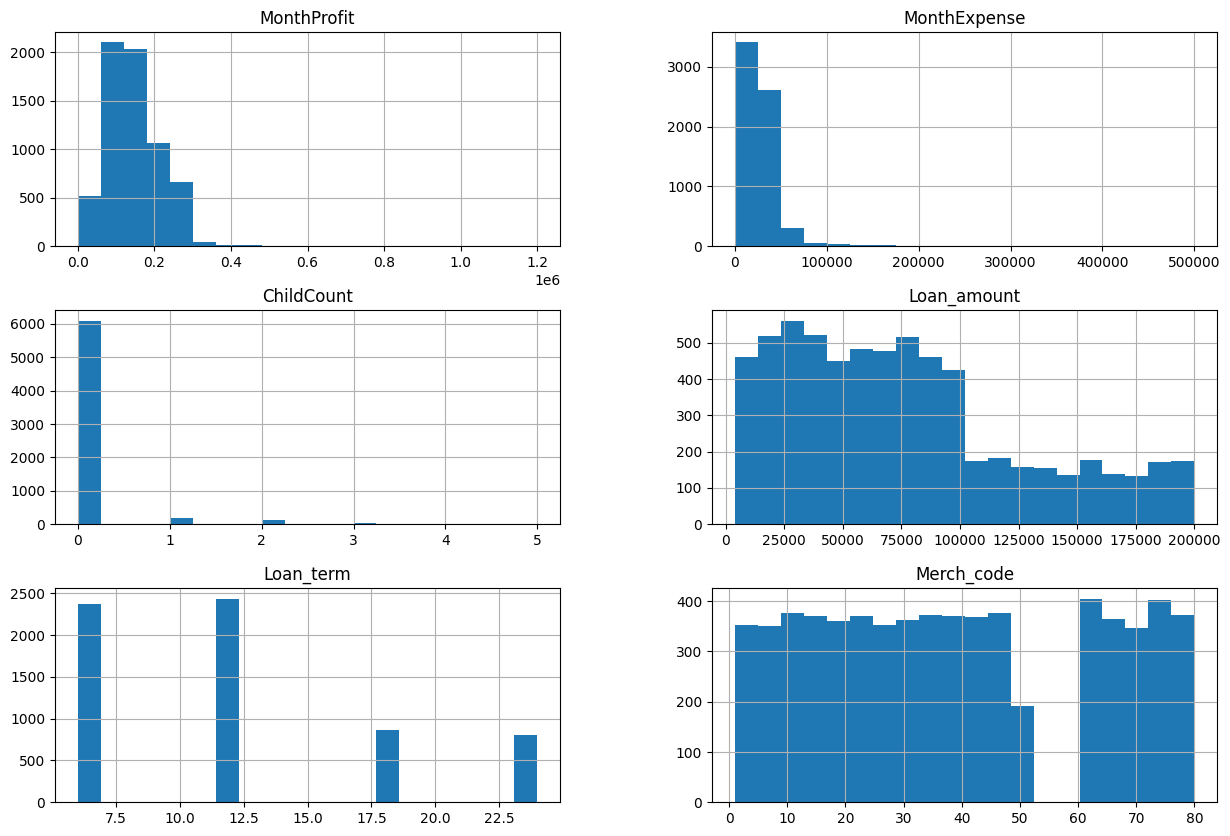

In [20]:
# Plot histograms for numeric variables
numeric_vars = ['MonthProfit', 'MonthExpense', 'ChildCount', 'SNILS', 'Loan_amount', 'Loan_term', 'Merch_code']
df[numeric_vars].hist(bins=20, figsize=(15, 10))
plt.show()

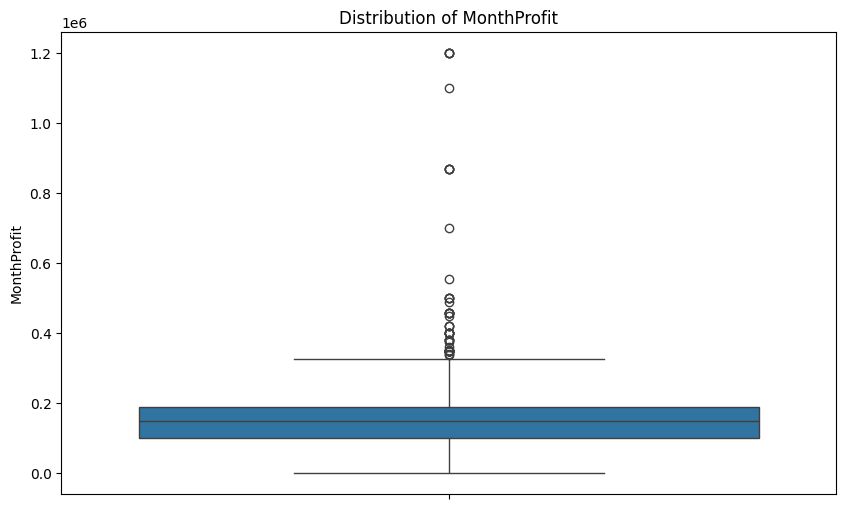

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['MonthProfit'],)
plt.title(f'Distribution of MonthProfit')
plt.show()

In [22]:
df[df['MonthProfit'] > 1000000]

,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,Family status,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
SkillFactory_Id,,,,,,,,,,,,,,,,,,,,,
3203,1995-08-22,Бакалавр,Собственное дело,3 - 4 года,2020-04-01,инд,1100000,300000,1,Никогда в браке не состоял(а),...,1,success,success,success,success,success,50,192000,24,Travel
8034,1970-12-12,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2010-01-01,сотрудник охраны,1200000,3000,1,Никогда в браке не состоял(а),...,0,success,success,denied,success,success,76,38000,6,Furniture
8040,1970-12-12,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2010-01-01,сотрудник охраны,1200000,3000,1,Никогда в браке не состоял(а),...,0,success,success,success,success,success,76,186000,24,Furniture
8053,1970-12-12,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2010-01-01,сотрудник охраны,1200000,3000,1,Никогда в браке не состоял(а),...,0,success,success,success,success,success,61,40000,6,Mobile_devices
8056,1970-12-12,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2010-01-01,сотрудник охраны,1200000,3000,1,Никогда в браке не состоял(а),...,0,success,success,success,success,success,37,48000,6,Education


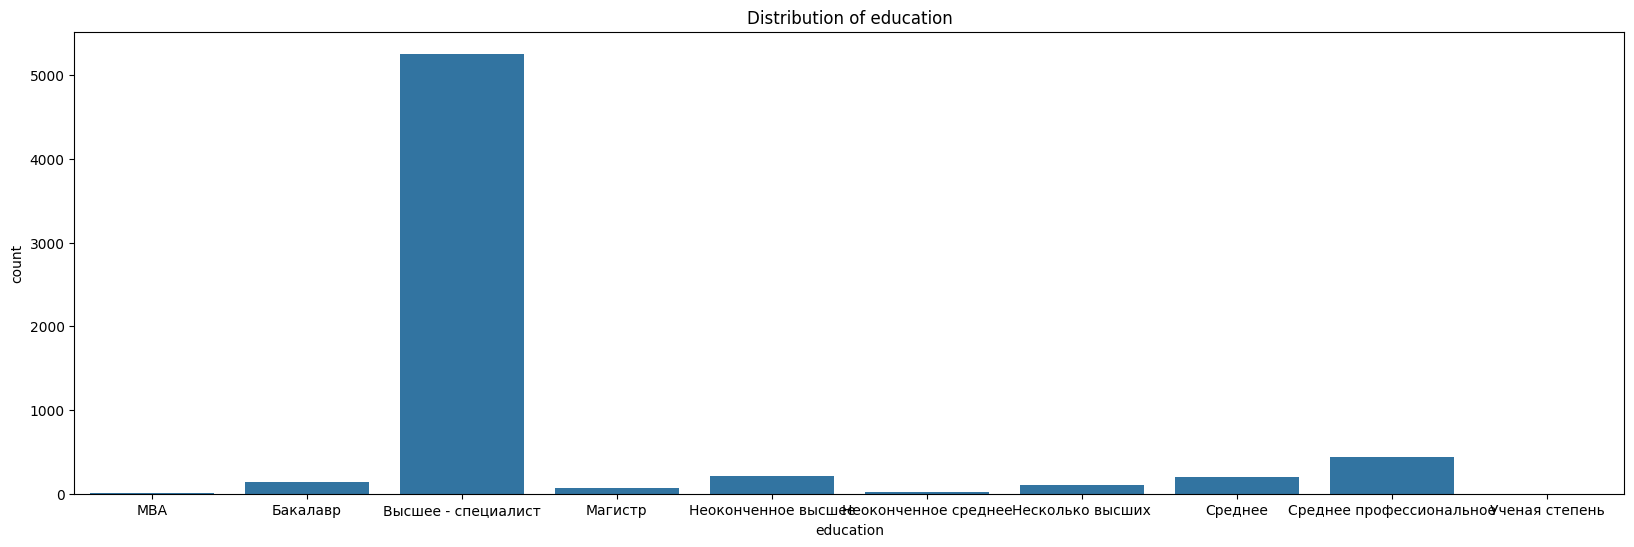

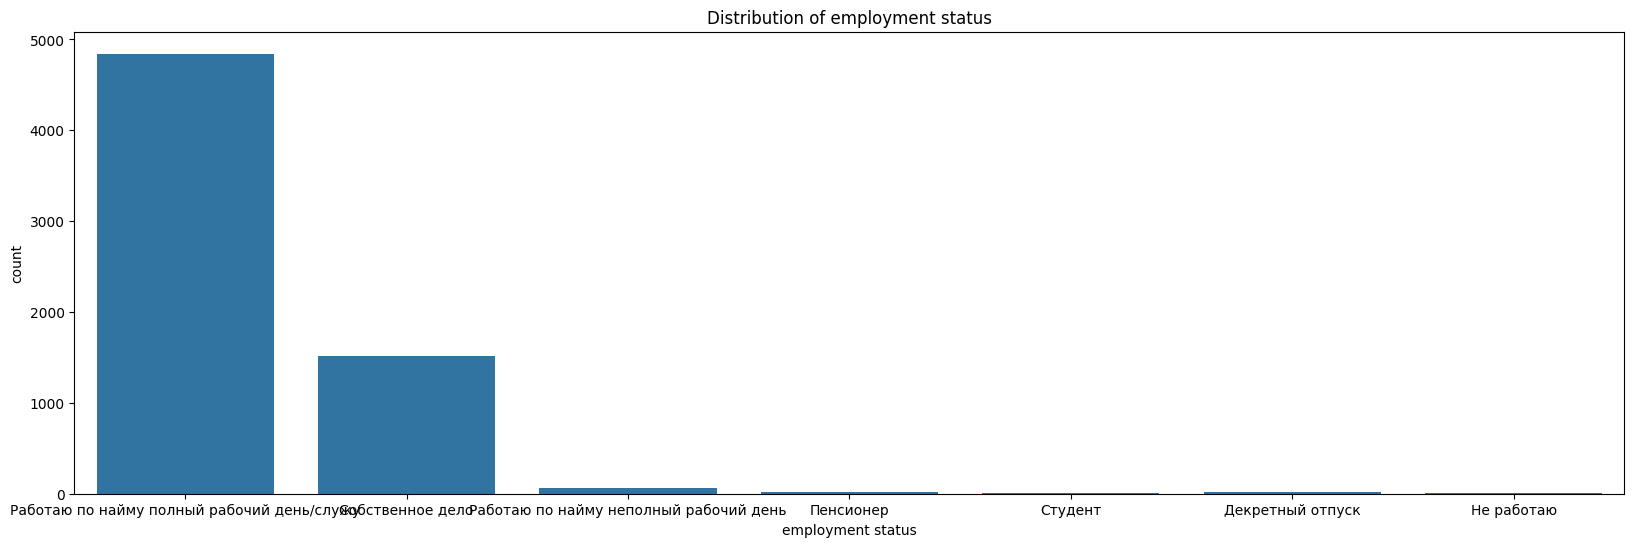

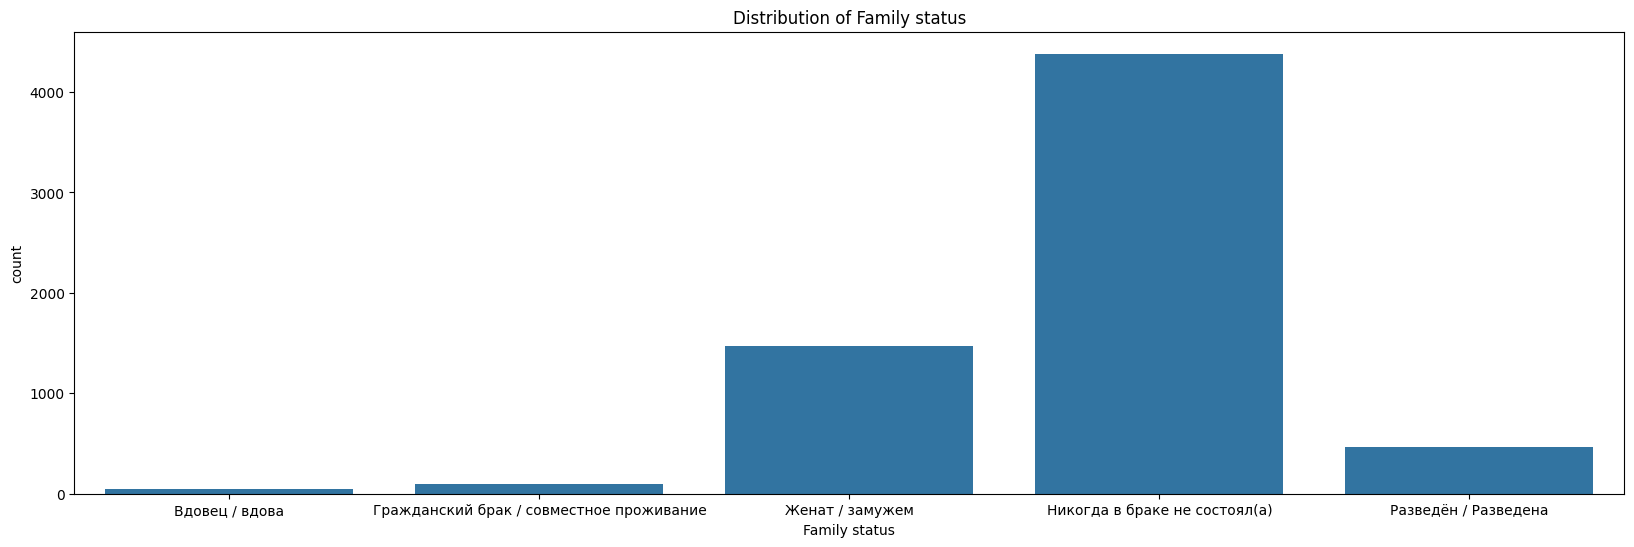

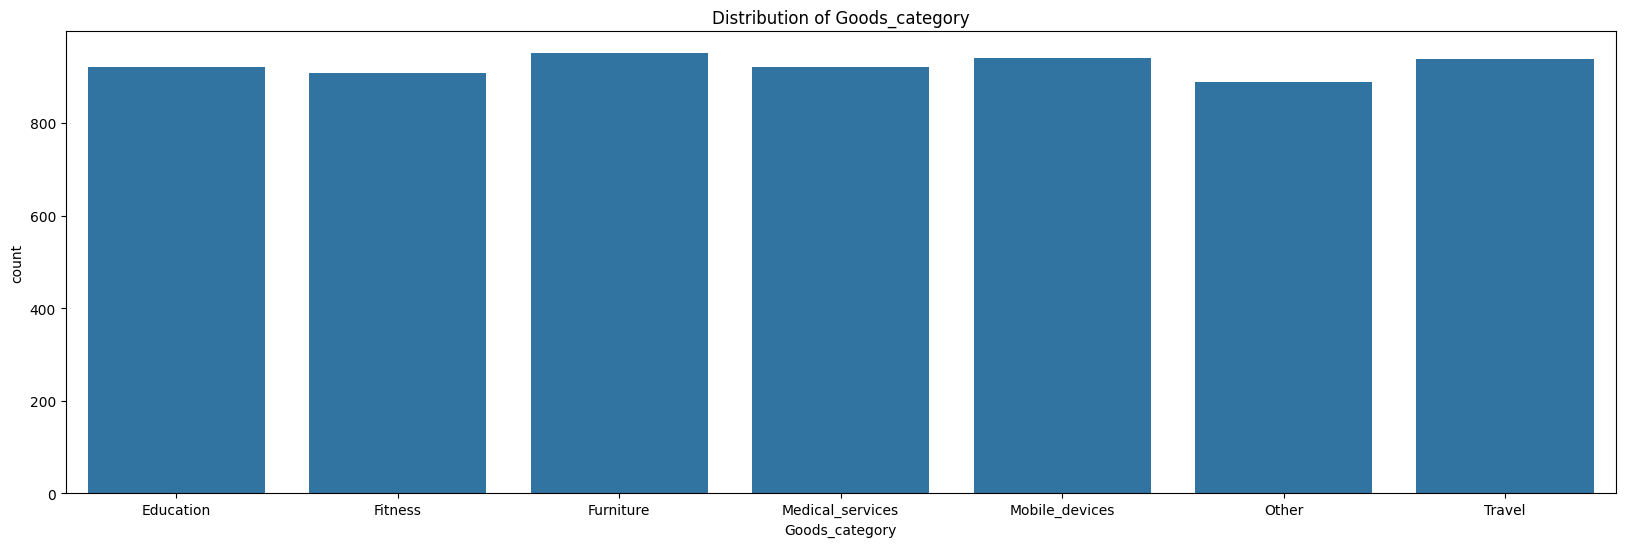

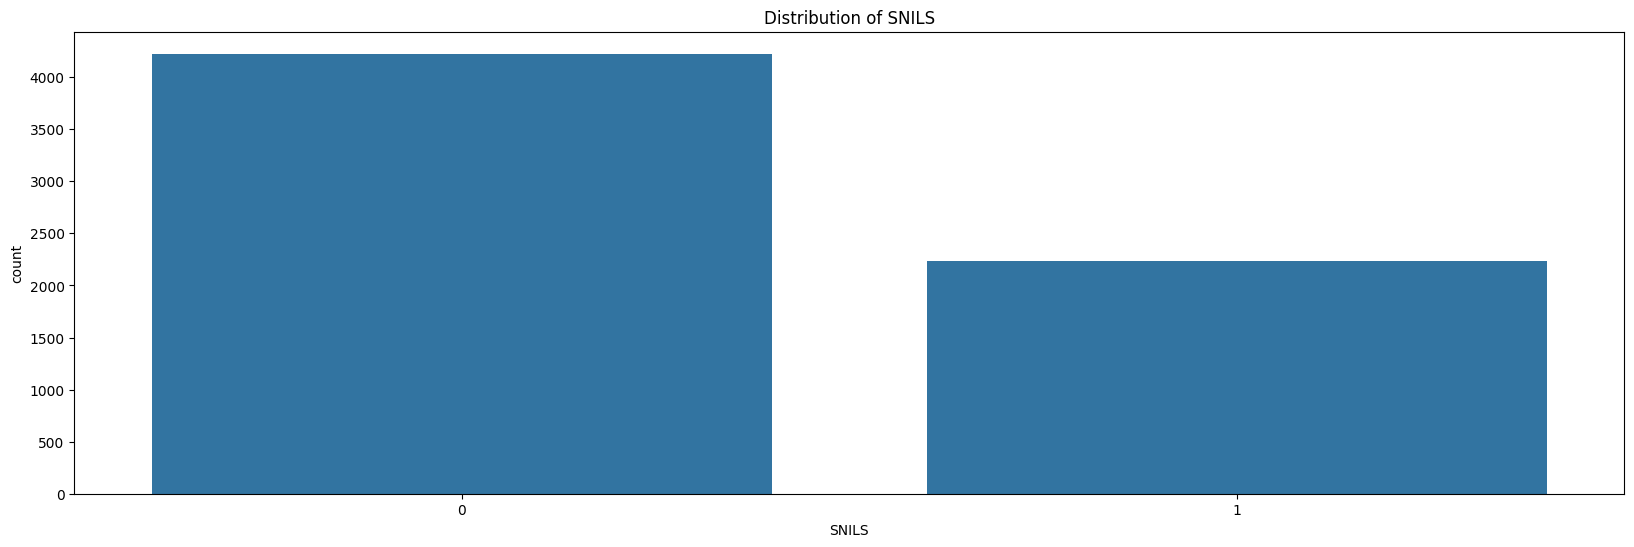

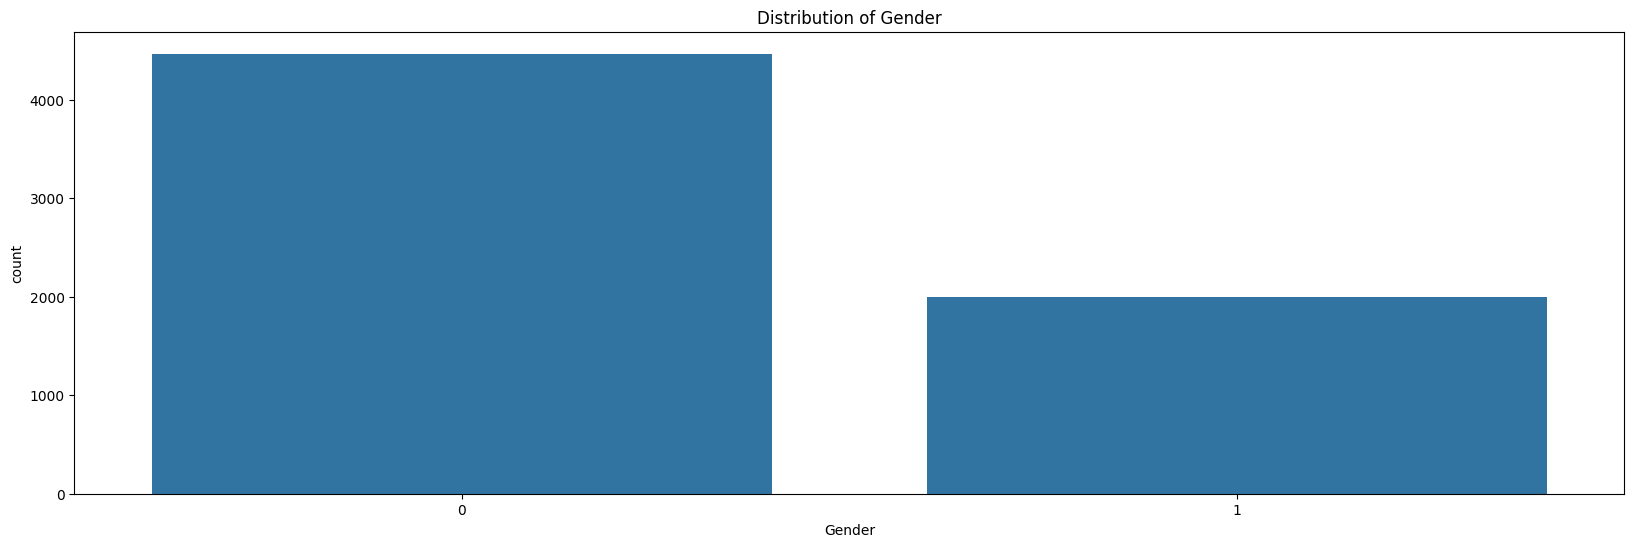

In [23]:
# Explore categorical variables
cat_vars = ['education', 'employment status', 'Family status', 'Goods_category', 'SNILS', 'Gender']
for var in cat_vars:
    plt.figure(figsize=(20, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.show()

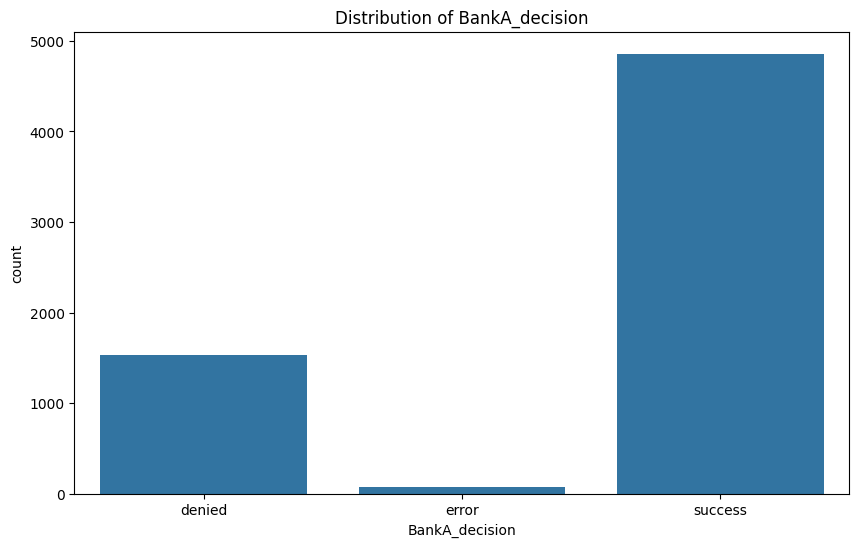

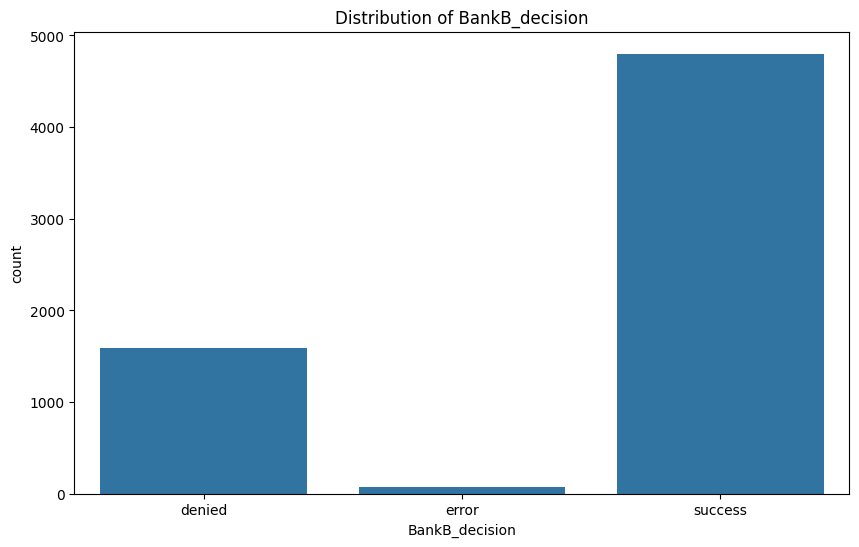

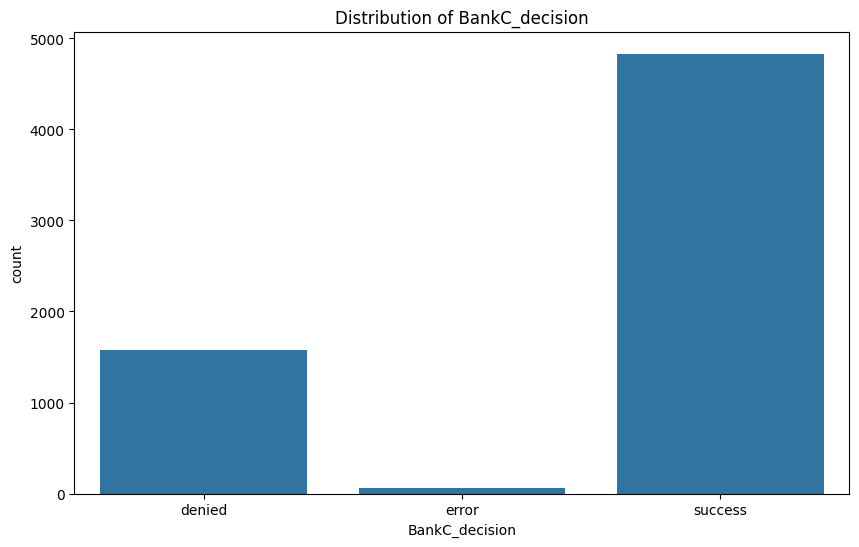

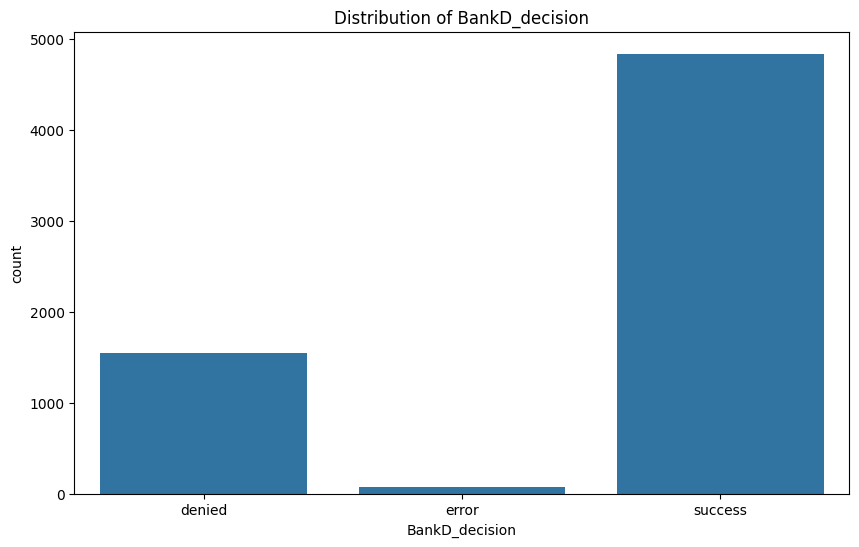

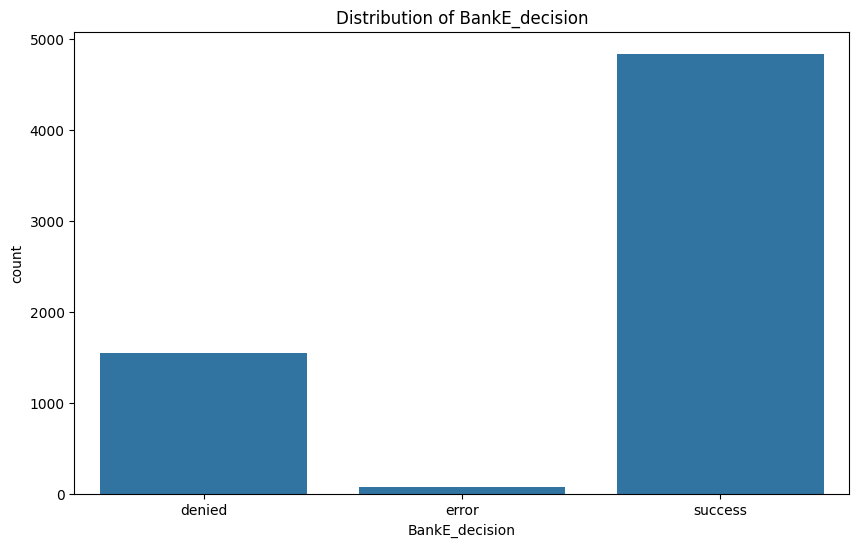

In [24]:
# Explore bank decisions
bank_decision = ['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision']
for bank in bank_decision:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=bank, data=df)
    plt.title(f'Distribution of {bank}')
    plt.show()

In [25]:
# List of bank decision columns
bank_decision_columns = ['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision']

# Create a new column 'Overall_decision' with the overall decision for each row
df['Overall_decision'] = df[bank_decision_columns].apply(lambda row: 'success' if 'success' in row.values else 'denied', axis=1)
df['Overall_decision'] = df['Overall_decision'].astype('category')

# Count the overall decisions
overall_decision_count = df['Overall_decision'].value_counts()

# Display the results
print("Overall Bank Decisions:")
print(overall_decision_count)

Overall Bank Decisions:
Overall_decision
success    6456
denied        8
Name: count, dtype: int64


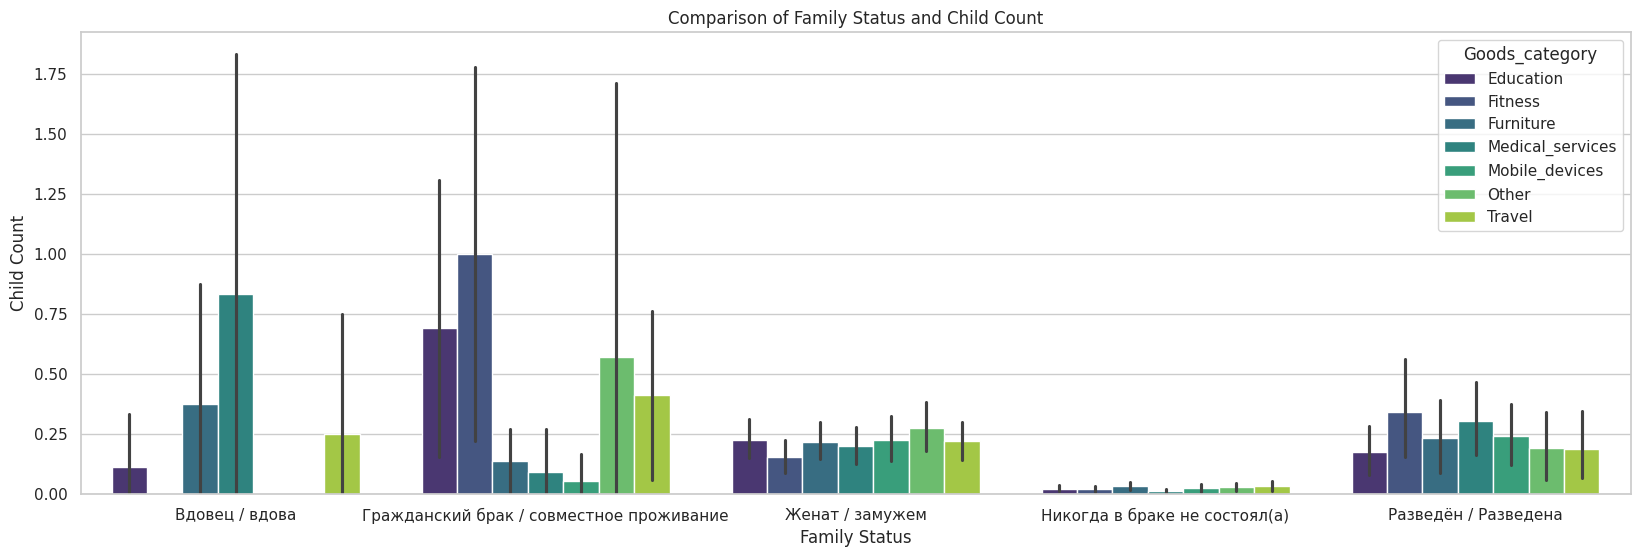

In [26]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot comparing 'Family status' with 'ChildCount'
plt.figure(figsize=(20, 6))
sns.barplot(x='Family status', y='ChildCount', data=df, palette='viridis', hue='Goods_category')
plt.title('Comparison of Family Status and Child Count')
plt.xlabel('Family Status')
plt.ylabel('Child Count')
plt.show()

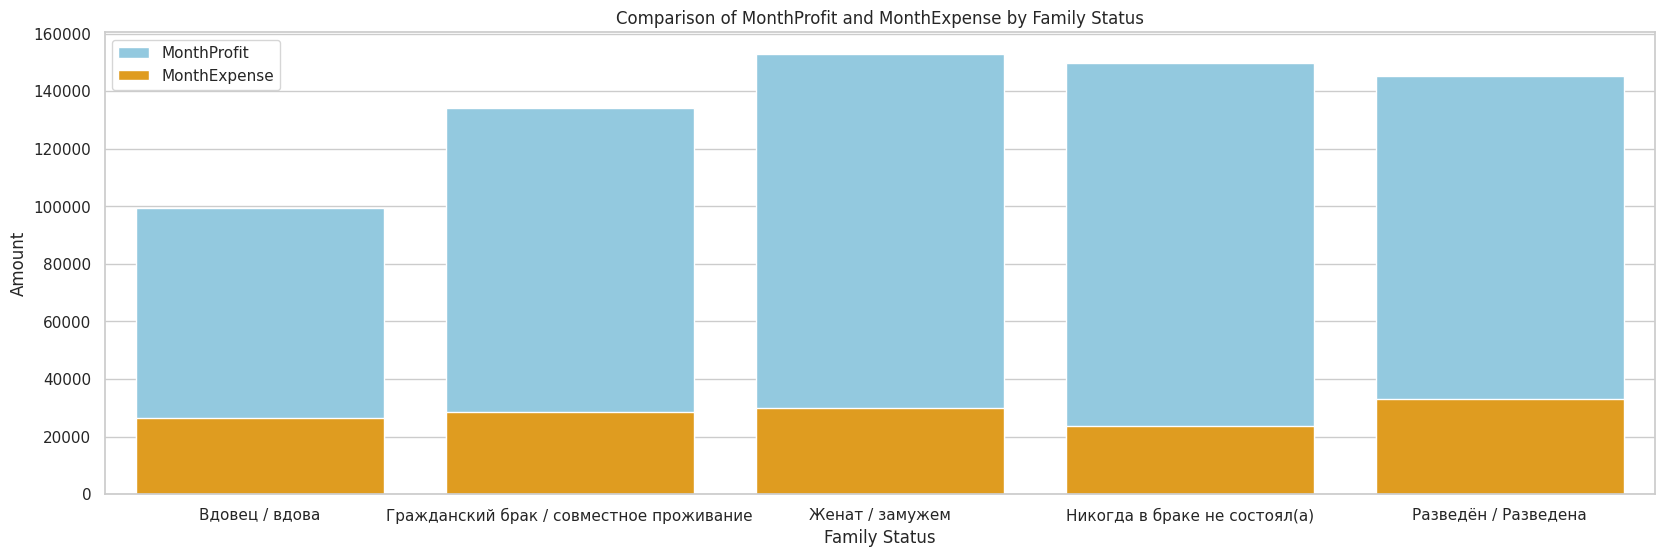

In [27]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot comparing 'MonthProfit' and 'MonthExpense'
plt.figure(figsize=(20, 6))
sns.barplot(x='Family status', y='MonthProfit', data=df, color='skyblue', label='MonthProfit', errorbar=None)
sns.barplot(x='Family status', y='MonthExpense', data=df, color='orange', label='MonthExpense', errorbar=None)
plt.title('Comparison of MonthProfit and MonthExpense by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Amount')
plt.legend()
plt.show()

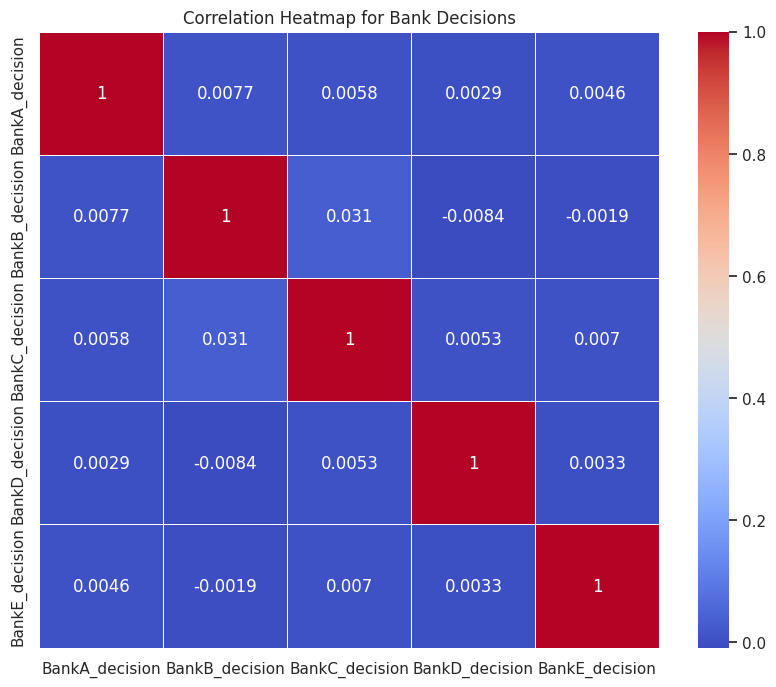

In [28]:
# Select columns related to bank decisions
bank_decisions_columns = ['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision']

# Create a DataFrame containing only bank decision columns
bank_decisions_df = df[bank_decisions_columns]

# Map 'success' and 'denied' to numeric values (1 and 0)
bank_decisions_df_numeric = bank_decisions_df.map(lambda x: 1 if x == 'success' else 0)

# Calculate the correlation matrix
correlation_matrix = bank_decisions_df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Bank Decisions')
plt.show()

In [29]:
df['MonthExpense'].describe()

count          6464.0
mean     25739.983137
std      20301.771239
min               0.0
25%           15000.0
50%           22500.0
75%           30000.0
max          500000.0
Name: MonthExpense, dtype: Float64

In [30]:
df['Income_Expense_Ratio'] = np.where(df['MonthExpense'] != 0, df['MonthProfit'] / df['MonthExpense'], np.nan)

# Display the updated DataFrame
print(df[['MonthProfit', 'MonthExpense', 'Income_Expense_Ratio']])

                 MonthProfit  MonthExpense Income_Expense_Ratio
SkillFactory_Id                                                
1                     180000         90000                  2.0
2                     200000         60000             3.333333
3                     300000         45000             6.666667
4                     300000         45000             6.666667
5                     300000         45000             6.666667
...                      ...           ...                  ...
8780                  125000         15000             8.333333
8782                  150000         14000            10.714286
8783                  130000         30000             4.333333
8786                  150000         10000                 15.0
8787                  150000         10000                 15.0

[6464 rows x 3 columns]


In [31]:
df['Income_Expense_Ratio'].isna().sum()

5

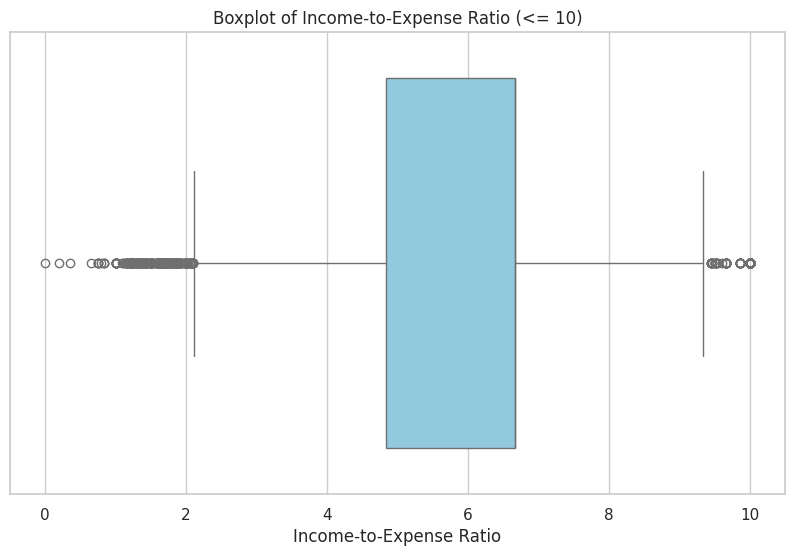

In [32]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Filter the DataFrame for ratios less than or equal to 10
filtered_df = df[df['Income_Expense_Ratio'] <= 10]

# Create a boxplot for 'Income_Expense_Ratio'
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['Income_Expense_Ratio'], color='skyblue')
plt.title('Boxplot of Income-to-Expense Ratio (<= 10)')
plt.xlabel('Income-to-Expense Ratio')
plt.show()

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6464 entries, 1 to 8787
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   BirthDate             6464 non-null   datetime64[ns]
 1   education             6464 non-null   category      
 2   employment status     6464 non-null   object        
 3   Value                 6464 non-null   object        
 4   JobStartDate          6464 non-null   datetime64[ns]
 5   Position              6464 non-null   object        
 6   MonthProfit           6464 non-null   UInt64        
 7   MonthExpense          6464 non-null   UInt64        
 8   Gender                6464 non-null   category      
 9   Family status         6464 non-null   category      
 10  ChildCount            6464 non-null   UInt8         
 11  SNILS                 6464 non-null   category      
 12  BankA_decision        6464 non-null   category      
 13  BankB_decision        6

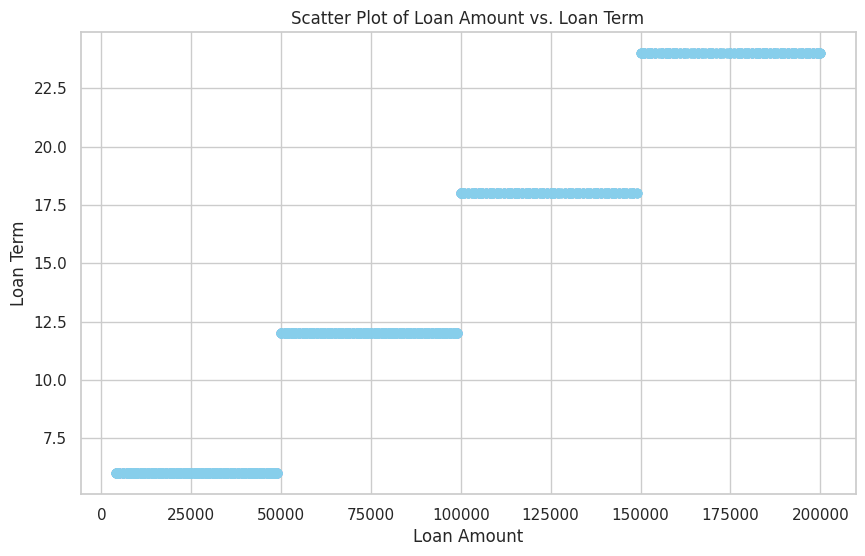

In [34]:
# Create a scatter plot for 'Loan_amount' and 'Loan_term'
plt.figure(figsize=(10, 6))
plt.scatter(df['Loan_amount'], df['Loan_term'], color='skyblue', alpha=0.5, )
plt.title('Scatter Plot of Loan Amount vs. Loan Term')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Term')
plt.show()

Correlation between BankA_decision and Loan_term: 0.00073681290046489


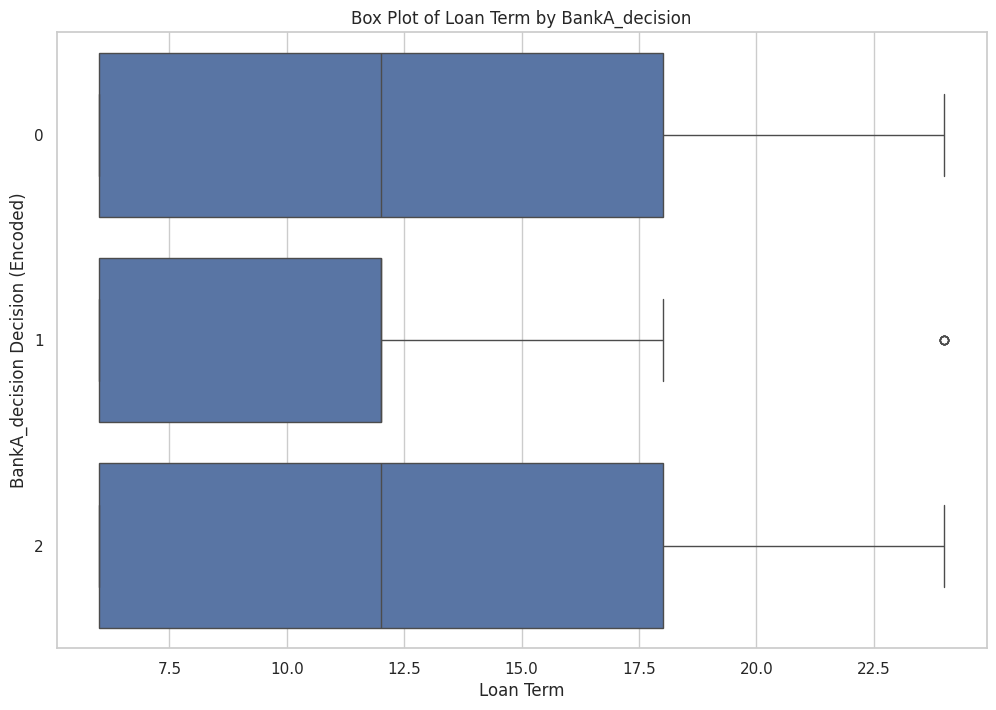

Correlation between BankA_decision and Loan_term: -0.007957445268674293


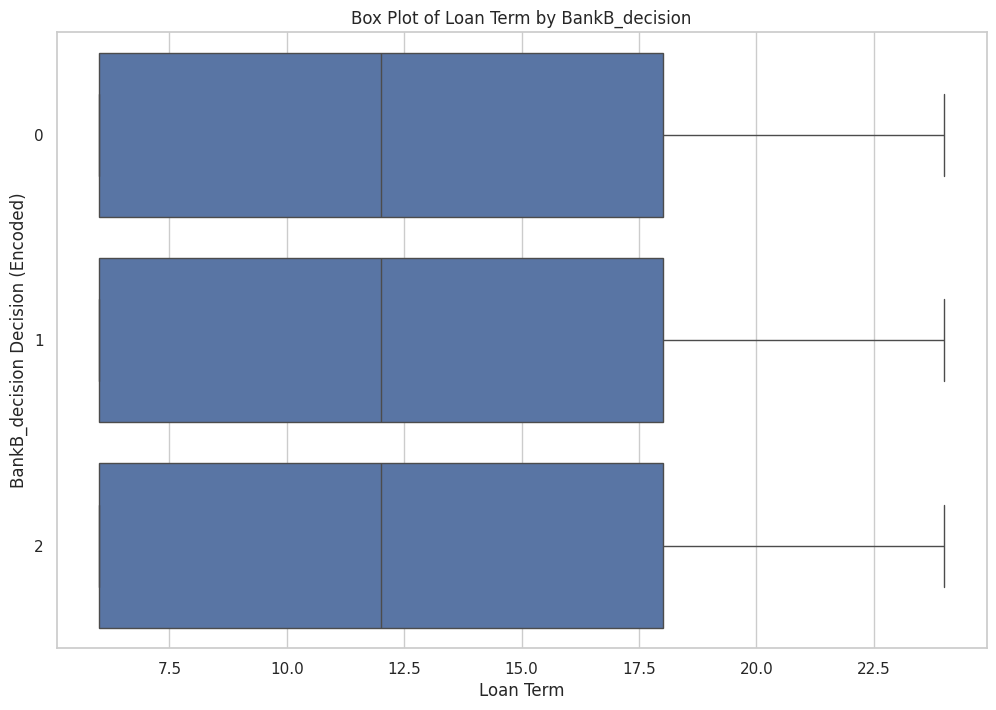

Correlation between BankA_decision and Loan_term: -0.006491222257135123


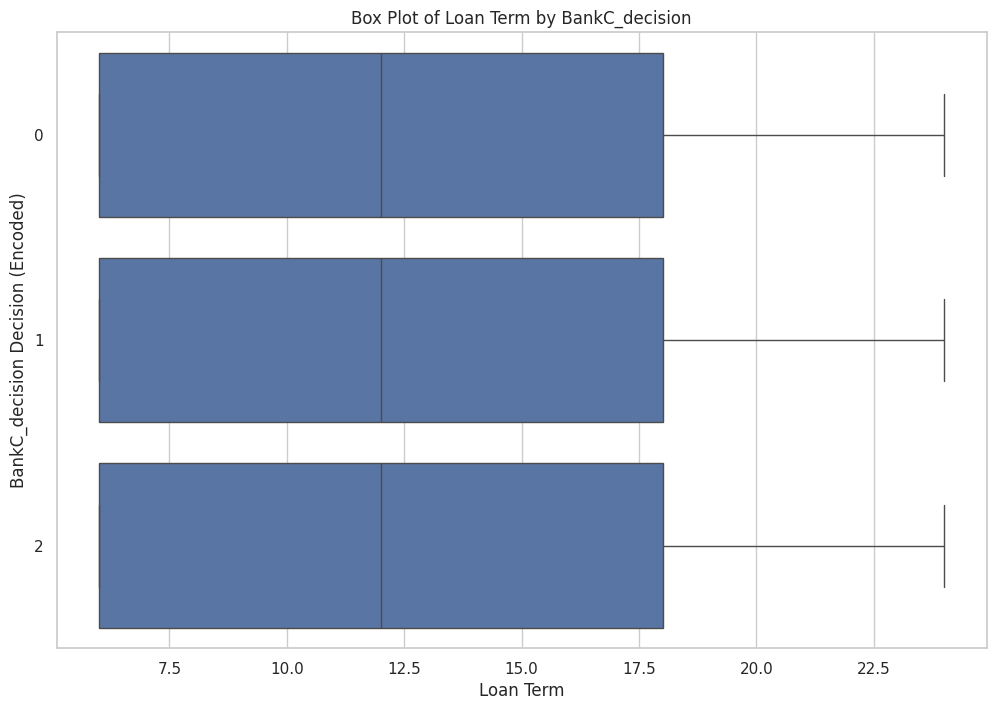

Correlation between BankA_decision and Loan_term: 0.006449319299910682


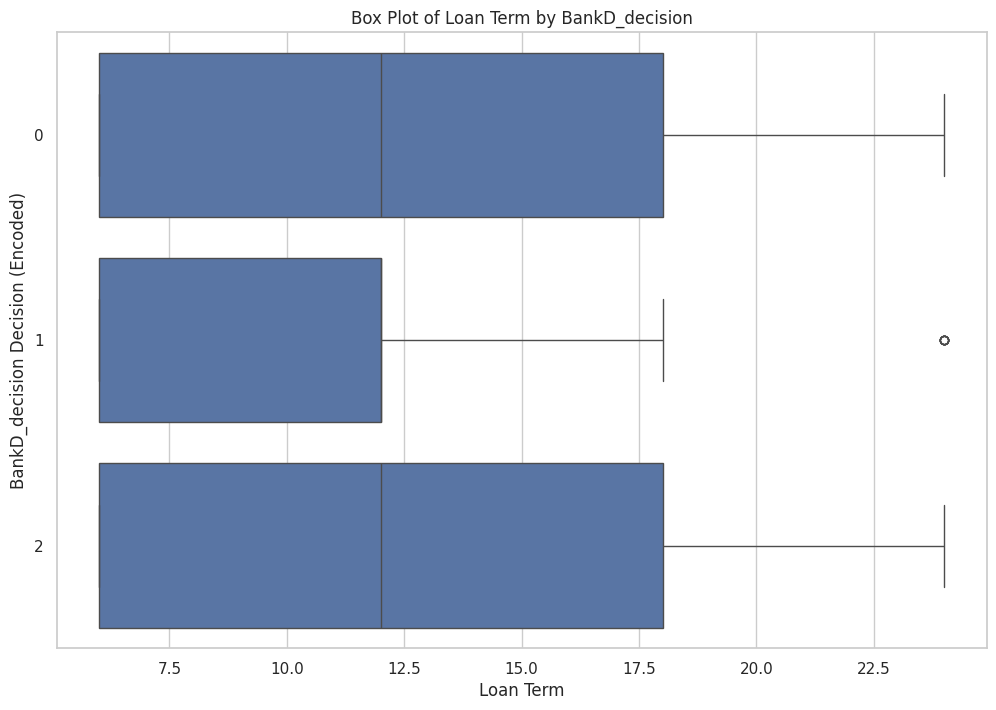

Correlation between BankA_decision and Loan_term: -0.01005051375676344


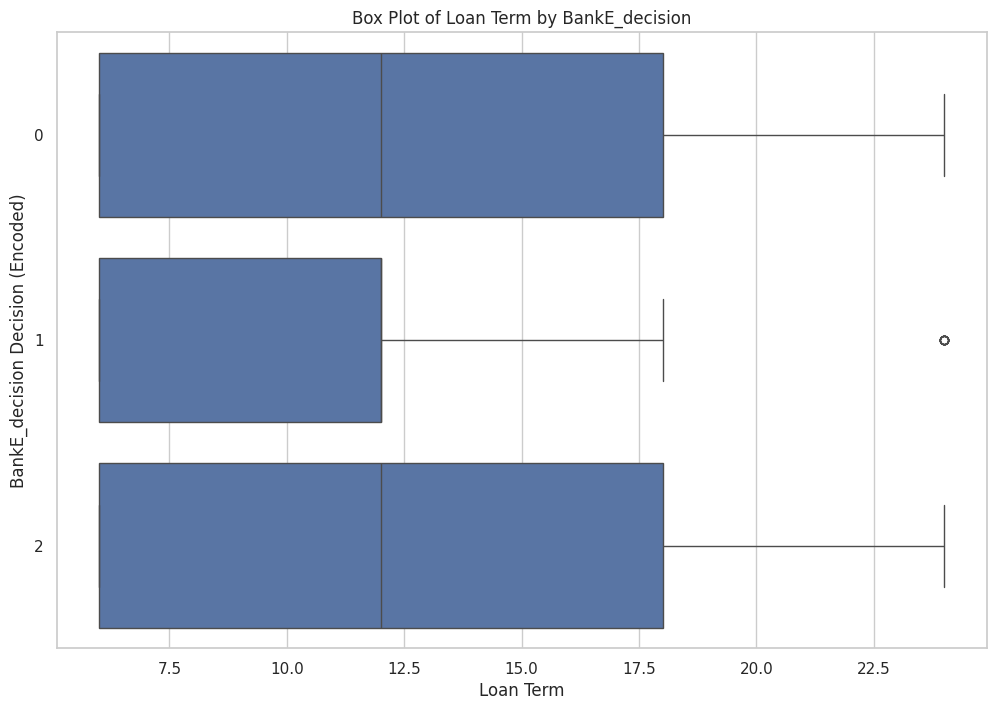

In [35]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# List of bank decision columns
bank_decision_columns = ['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision']

# Calculate point-biserial correlation with loan term for each bank decision
label_encoder = LabelEncoder()
for bank in bank_decision_columns:
    df[bank] = label_encoder.fit_transform(df[bank])

    # Calculate point-biserial correlation with loan term for 'BankA_decision_encoded'
    correlation, _ = stats.pointbiserialr(df[bank], df['Loan_term'])

    # Display the correlation coefficient
    print(f"Correlation between BankA_decision and Loan_term: {correlation}")

    # Visualize the relationship using a box plot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Loan_term', y=bank, data=df, orient='h')
    plt.title(f'Box Plot of Loan Term by {bank}')
    plt.xlabel('Loan Term')
    plt.ylabel(f'{bank} Decision (Encoded)')
    plt.show()
        


In [36]:
# df.to_csv('SF_Mandarin_dataset_processed.csv', sep=',')